In [24]:
from cpclasses import *

[Text(0.5, 0, 'x'), Text(0, 0.5, 'y'), (-3.0, 7.0), (-1.0, 2.0)]

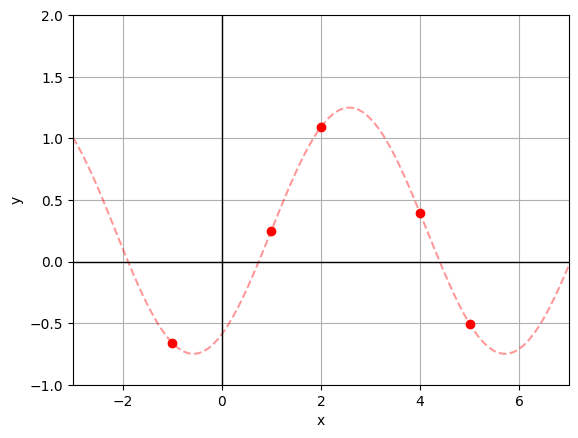

In [25]:
#Consider the function

def y(x):
    return np.sin(x-1) + 1/4


samples = np.array([-1, 1, 2, 4, 5]).astype(float)
xs = np.linspace(-3, 7, 100)

fig, ax = plt.subplots()
coordinate_axes(ax, lw = 1)

ax.plot(samples, y(samples), 'ro')
ax.plot(xs, y(xs), 'r--', alpha = 0.4)

ax.grid(zorder = 0)
ax.set(xlabel='x', ylabel='y', xlim=(-3, 7), ylim=(-1, 2))


In [26]:
KR_2nd = KernelRegression(samples, y(samples), 
        kernel = 'poly', degree =2, reg_type = '2nd Polynomial Ridge', lmb = 1e-4, 
        x_range= (-3, 7))

KR_2nd.regression()
print(f'The coeffiecients are {KR_2nd.alphas}')

The coeffiecients are [  892.6677605  -3589.96968552  2716.35280965   854.90534482
  -873.87003245]


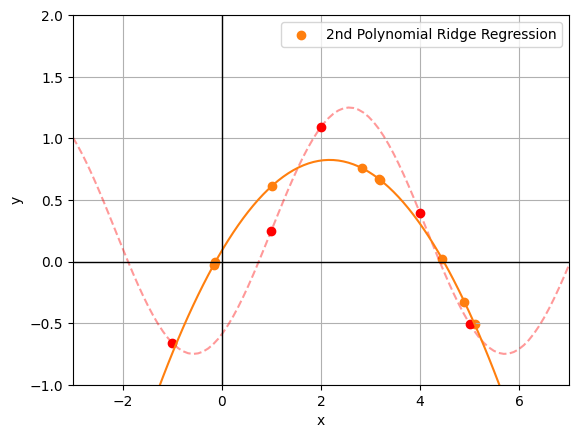

In [27]:
fig, ax = plt.subplots()

coordinate_axes(ax, lw = 1)


ax.plot(samples, y(samples), 'ro')
ax.plot(xs, y(xs), 'r--', alpha = 0.4)


x_random = np.random.uniform(-3, 7, 10)

KR_2nd.plot(ax, x_random, solid_line=True)
ax.grid()
ax.set(xlabel='x', ylabel='y', xlim=(-3, 7), ylim=(-1, 2))
ax.legend()

In [28]:


KR_8th = KernelRegression(samples, y(samples), 
        kernel = 'poly', degree = 8, reg_type = '8th Polynomial Ridge', lmb = 1e0, 
        x_range= (-3, 7))

KR_8th.regression()
print(f'The coeffiecients are {KR_8th.alphas}')

The coeffiecients are [-2.53390135e-03  3.11516048e-03 -1.63790662e-04  3.26798372e-06
 -4.48032078e-07]


[Text(0.5, 0, 'x'), Text(0, 0.5, 'y'), (-3.0, 7.0), (-1.0, 2.0)]

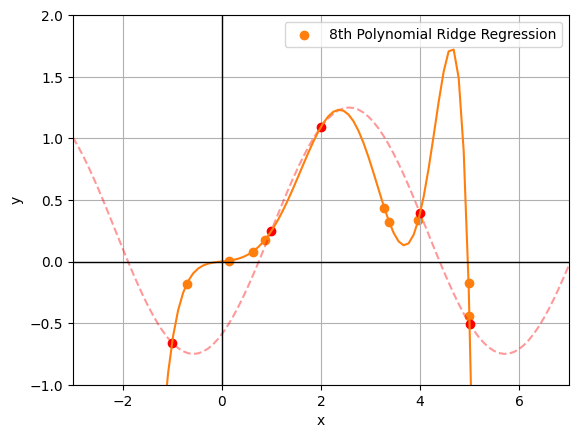

In [29]:
fig, ax = plt.subplots()

coordinate_axes(ax, lw = 1)


ax.plot(samples, y(samples), 'ro')
ax.plot(xs, y(xs), 'r--', alpha = 0.4)


x_random = np.random.uniform(-3, 5, 10)

KR_8th.plot(ax, x_random, solid_line=True)
ax.grid()
ax.legend()
ax.set(xlabel='x', ylabel='y', xlim=(-3, 7), ylim=(-1, 2))

In [30]:
bandwidth = 1

def gaussian_kernel(xi, xj):
    K_ij = np.exp(-0.5 * (xi - xj)**2/bandwidth**2)
    return K_ij


KR_gauss = KernelRegression(samples, y(samples), 
        kernel = 'gauss', bandwidth = 1, reg_type = 'Gauss Kernel Ridge', lmb = 1e-4, 
        x_range= (-3, 5))

KR_gauss.regression()
print(f'The coeffiecients are {KR_gauss.alphas}')

The coeffiecients are [-0.61354006 -0.44122493  1.2615103   0.85577004 -1.03961539]


[Text(0.5, 0, 'x'), Text(0, 0.5, 'y'), (-3.0, 7.0), (-1.0, 2.0)]

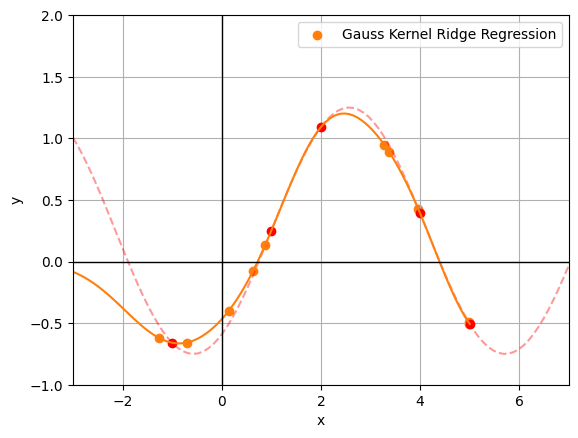

In [31]:
fig, ax = plt.subplots()

coordinate_axes(ax, lw = 1)


ax.plot(samples, y(samples), 'ro')
ax.plot(xs, y(xs), 'r--', alpha = 0.4)




KR_gauss.plot(ax, x_random, solid_line=True)
ax.grid()
ax.legend()
ax.set(xlabel='x', ylabel='y', xlim=(-3, 7), ylim=(-1, 2))

[Text(0.5, 0, 'x'), Text(0, 0.5, 'y'), (-3.0, 7.0), (-1.0, 2.0)]

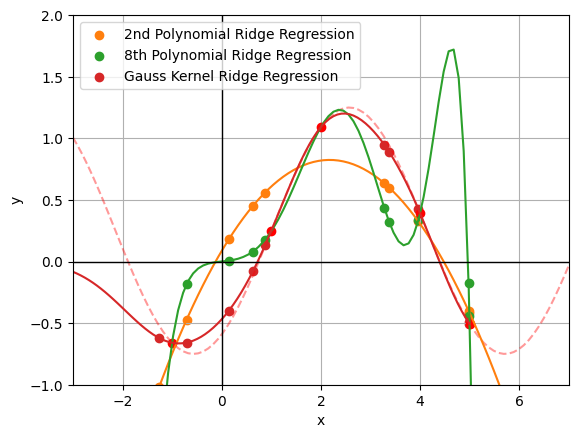

In [32]:
fig, ax = plt.subplots()

coordinate_axes(ax, lw = 1)


ax.plot(samples, y(samples), 'ro')
ax.plot(xs, y(xs), 'r--', alpha = 0.4)




KR_2nd.plot(ax, x_random, solid_line=True, color = 'C1')
KR_8th.plot(ax, x_random, solid_line=True, color = 'C2')
KR_gauss.plot(ax, x_random, solid_line=True, color = 'C3')
ax.grid()
ax.legend()
ax.set(xlabel='x', ylabel='y', xlim=(-3, 7), ylim=(-1, 2))

The coeffiecients are [ 8958.22141772  4202.5154005    921.93224128 -1093.53229566
 -2450.49491148  4752.75200932 -8606.7888006  -1624.55291956
  7426.32135223  7205.83832469   581.79771206  4573.96189162
 -6411.94922415 -8770.30926271  5812.07766498  -646.44706847
 -1932.50714411 -7088.29167932 -4651.7499542  -1158.49452433]
The coeffiecients are [   62.71358657    82.40108853   -64.09203853   582.57921893
   163.20055538  -540.1873071    183.75346816   138.08205303
    43.23325322  1209.32999041  -550.86888623 -1392.21952256
 -1046.3510307  -1215.5413726   -261.54580902   210.32041241
   944.71344637   350.79491653    91.437728    1007.62634886]
The coeffiecients are [  -20.73327703   173.76827584     4.46813176   180.33338744
    -7.74184119  -134.09740271    88.72496653   -82.78405649
   -33.14442918  1314.40843615  -407.80300696 -1090.04696466
   134.48898998   -36.5188431   -112.02361561   292.72196186
   108.21333387  -115.94749909  -307.79424967    51.84888559]


[Text(0.5, 0, 'x'), Text(0, 0.5, 'y'), (-3.0, 8.0), (-1.0, 2.0)]

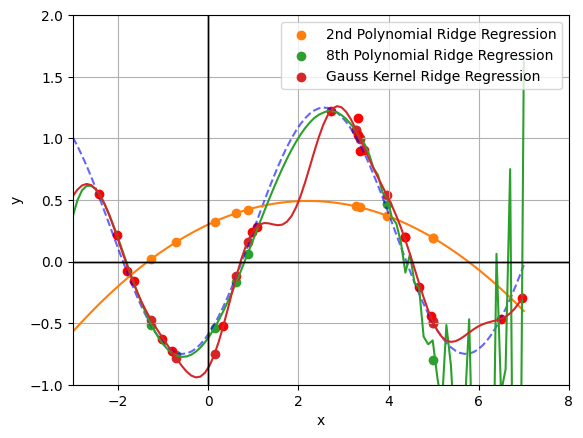

In [43]:
x_samples_with_noise = np.random.uniform(-3, 7, 20) 
y_samples_with_noise = y(x_samples_with_noise) + np.random.normal(0, 0.1, 20)
fig, ax = plt.subplots()

coordinate_axes(ax, lw = 1)

ax.plot(x_samples_with_noise, y_samples_with_noise, 'ro')
ax.plot(xs, y(xs), 'b--', alpha = 0.6)


poly_2nd =  KernelRegression(x_samples_with_noise, y_samples_with_noise, 
        kernel = 'poly',degree = 2 , reg_type = '2nd Polynomial Ridge', lmb = 1e-4, 
        x_range= (-3, 7))

poly_8th = KernelRegression(x_samples_with_noise, y_samples_with_noise,
        kernel = 'poly',degree = 8 , reg_type = '8th Polynomial Ridge', lmb = 1e-4, 
        x_range= (-3, 7))

gauss = KernelRegression(x_samples_with_noise, y_samples_with_noise,
        kernel = 'gauss', bandwidth = 1 , reg_type = 'Gauss Kernel Ridge', lmb = 1e-4, 
        x_range= (-3, 7))
kernels = [poly_2nd, poly_8th, gauss]
reg_types = ['2nd Polynomial Ridge', '8th Polynomial Ridge', 'Gauss Kernel Ridge']
colors = ['C1', 'C2', 'C3']

for kernel, color, reg_type in zip(kernels, colors, reg_types):
    

    kernel.regression()
    print(f'The coeffiecients are {kernel.alphas}')
    kernel.plot(ax, x_random, solid_line=True, color = color)


ax.grid()
ax.legend(loc='upper right', fontsize = 10)
coordinate_axes(ax, lw = 1)
ax.set(xlabel='x', ylabel='y', xlim=(-3, 8), ylim=(-1, 2))

In [44]:
save_plot(fig, 'different_kernel_regressions.png')